In [3]:
import pandas as pd

df = pd.read_csv('./data/bike_predictor/hour.csv')

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


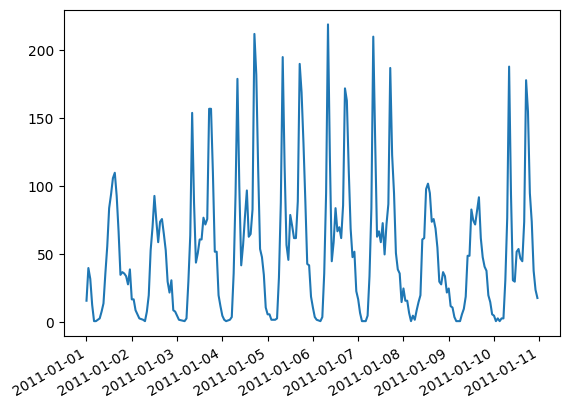

In [4]:
import matplotlib.pyplot as plt

ndf = df[df['dteday'] < '2011-01-11'].copy()
ndf['datetime'] = pd.to_datetime(ndf['dteday']) + pd.to_timedelta(ndf['hr'], unit='h')

plt.plot(ndf['datetime'], ndf['cnt'])
plt.gcf().autofmt_xdate()

In [106]:
X = df.iloc[:, 2:]
y = df.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

In [77]:
from torch.utils.data import DataLoader, TensorDataset

net = Net(15, 8)

X_tensor = torch.tensor(X).float()
y_tensor = torch.tensor(y).float()
dataset = TensorDataset(X_tensor, y_tensor)
data_iter = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [78]:
loss = nn.MSELoss()
optim = torch.optim.SGD(net.parameters(), lr=0.0003)

num_epochs = 3

losses = []
for epoch in range(num_epochs):
    for dtx, dty in data_iter:
        l = loss(net(dtx).squeeze() ,dty)
        optim.zero_grad()
        l.backward()
        optim.step()
        with torch.no_grad():
            l = loss(net(X_tensor).squeeze(), y_tensor)
            losses.append(l.detach().numpy())


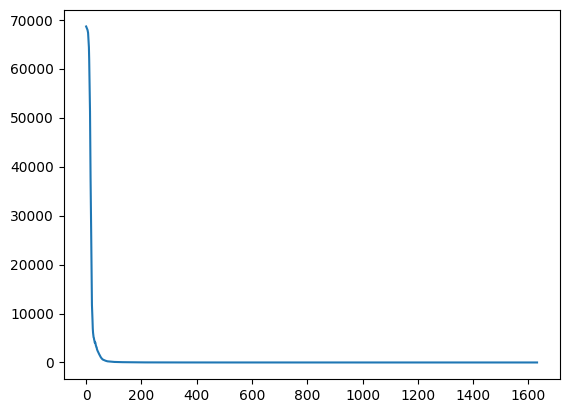

In [79]:
plt.plot(losses)

In [101]:
from torch.utils.data import DataLoader, TensorDataset

In [108]:
X_train, X_test, y_train, y_test = X[:-21*24], X[-21*24:], y[:-21*24], y[-21*24:]

In [109]:
X_train, X_val, y_train, y_val = X_train[:-21*24], X_train[-21*24:], y_train[:-21*24], y_train[-21*24:]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=23)

In [111]:
X_tensor = torch.tensor(X_train).float()
y_tensor = torch.tensor(y_train.to_numpy()).float()

dataset_train = TensorDataset(X_tensor, y_tensor)
data_iter = DataLoader(dataset=dataset_train, batch_size=23, shuffle=True)

X_val_tensor = torch.tensor(X_val).float()
y_val_tensor = torch.tensor(y_val.to_numpy()).float()

X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test.to_numpy()).float()

In [112]:
net = Net(15, 8)

loss = nn.MSELoss()
optim = torch.optim.SGD(net.parameters(), lr=0.0003)

num_epochs = 3
best_loss = float('inf')

losses = []
for epoch in range(num_epochs):
    for dtx, dty in data_iter:
        l = loss(net(dtx).squeeze() ,dty)
        optim.zero_grad()
        l.backward()
        optim.step()
        with torch.no_grad():
            l = loss(net(X_val_tensor).squeeze(), y_val_tensor).detach().numpy()
            if l < best_loss:
                best_loss = l
                torch.save(net.state_dict(), '../resource/bike/v1.pth')
            losses.append(l)


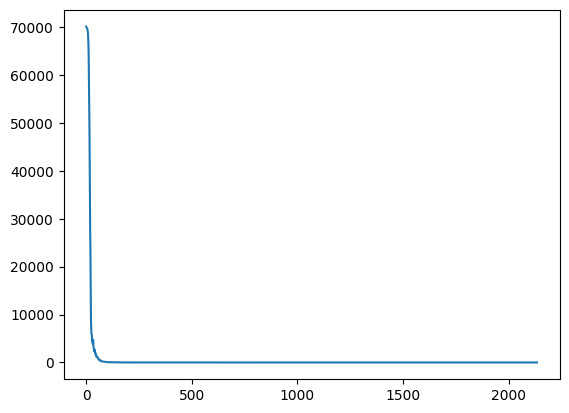

In [113]:
plt.plot(losses)

In [114]:
loss(net(X_test_tensor).squeeze(), y_test_tensor).detach().numpy()

array(0.50683177, dtype=float32)

In [115]:
testset = pd.DataFrame(df.iloc[:, ][-21*24:], columns=df.columns)

In [90]:
testset

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16875,4,1,12,22,0,1,1,2,0.50,0.4848,0.82,0.2239,11,115,126
16876,4,1,12,23,0,1,1,1,0.46,0.4545,0.88,0.2537,8,76,84
16877,4,1,12,0,0,2,1,3,0.46,0.4545,0.77,0.4627,2,29,31
16878,4,1,12,1,0,2,1,1,0.42,0.4242,0.71,0.4478,1,7,8
16879,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [117]:
targets = testset['cnt']
targets = targets.values.reshape([len(targets), 1])
targets = targets.astype('float')

In [133]:
x = torch.FloatTensor(scaler.transform(testset.iloc[:, 2:]))
y = torch.FloatTensor(targets)

In [134]:
pred = net(x).squeeze().detach().numpy()

In [159]:
loss(net(x), y)

tensor(0.5068, grad_fn=<MseLossBackward0>)

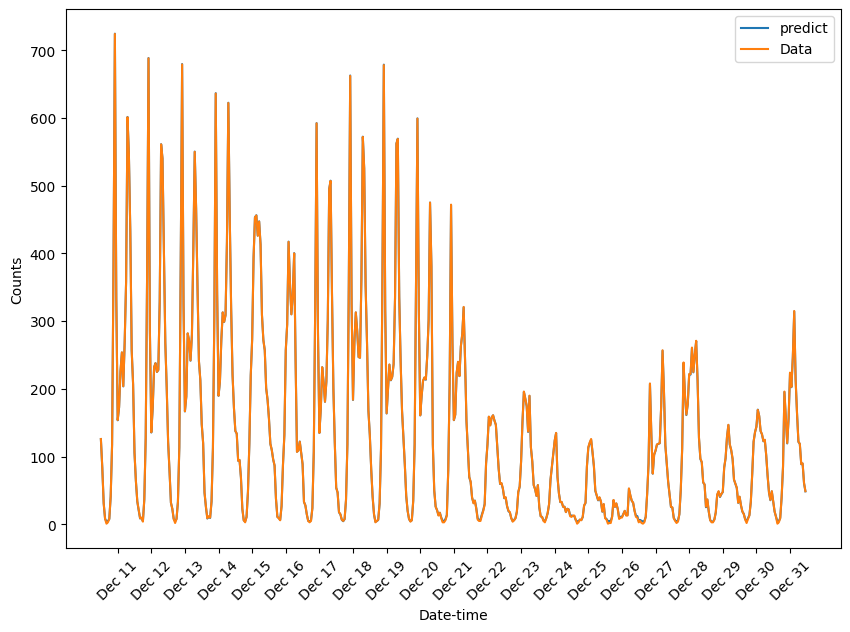

In [136]:
import numpy as np

fig, ax = plt.subplots(figsize = (10, 7))

ax.plot(pred, label='predict')
ax.plot(targets, label='Data')
ax.legend()

ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(testset['dteday'])
dates = dates.apply(lambda x: x.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)